# House Prices - Advanced Regression Techniques
### by Gonzalo Gómez Millán del Villar

<img src="https://m.foolcdn.com/media/affiliates/images/house_and_money_in_stacks.width-1200.jpg" width = 600>

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

## 1. Read libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()
    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
def fill_NA (df, idx, typ):
    '''
    This is a function used to fill the NaN values with the string "NA"
    INPUT:
        df - DataFrame: DataFrame to be cleaned
        idx - string: Variable with NaN values
    
    OUTPUT:
        None
    '''
    if typ == 'train':
        df_train_clean[idx].fillna('NA', inplace = True)
        print('The number of missing values of {} is {} after the cleaning operation.'.format(idx,df_train_clean[idx].isna().sum()))
        print('In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.')
    
    if typ == 'test':
        df_test_clean[idx].fillna('NA', inplace = True)
        print('The number of missing values of {} is {} after the cleaning operation.'.format(idx,df_train_clean[idx].isna().sum()))
        print('In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.')
        
    return

## 2. Exploratory analysis

First of all, we're taking a look at the data and the structure of the train set:

### TRAIN SET

In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df_train.duplicated().sum()

0

### TEST SET

In [10]:
df_test.shape

(1459, 80)

In [11]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [14]:
df_test.duplicated().sum()

0

Let's analyze if there are NaN values in the dataset and where.

<div class="alert alert-block alert-info">
<b>MISSING VALUES</b> </div>

### TRAIN SET

In [15]:
df_train_na = df_train.isna().sum()
df_train_na = df_train_na[df_train_na != 0]
df_train_na

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
print('There are {} variables with NaN values in the train set, so it is necessary to carry out some cleaning operations.'.format(len(df_train_na)))

There are 19 variables with NaN values in the train set, so it is necessary to carry out some cleaning operations.


### TEST SET

In [17]:
df_test_na = df_test.isna().sum()
df_test_na = df_test_na[df_test_na != 0]
df_test_na

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [18]:
print('There are {} variables with NaN values in the test set, so it is necessary to carry out some cleaning operations.'.format(len(df_test_na)))

There are 33 variables with NaN values in the test set, so it is necessary to carry out some cleaning operations.


<div class="alert alert-block alert-info">
<b>CLEANING MISSING VALUES</b> </div>

### TRAIN SET

- [x] LotFrontage      
- [x] Alley           
- [x] MasVnrType         
- [x] MasVnrArea         
- [x] BsmtQual          
- [x] BsmtCond          
- [x] BsmtExposure      
- [x] BsmtFinType1      
- [x] BsmtFinType2      
- [x] Electrical         
- [x] FireplaceQu      
- [x] GarageType        
- [x] GarageYrBlt       
- [x] GarageFinish      
- [x] GarageQual        
- [x] GarageCond        
- [x] PoolQC          
- [x] Fence           
- [x] MiscFeature     

In [19]:
df_train_clean = df_train.copy()

It is interesting to see in a headmap the correlation between the different parameters, so we can analyze analyze the impact of the cleaning process in the variables and its relation with SalePrice.

In [20]:
corr_train = df_train.corr()

Nevertheless, we should focus on the correlation of the different parameters with SalePrice. Now I am sorting the correlation paramenters in descendingo order, so it is possible to realize which are the parameters with a higher correlation parameter:

In [21]:
corr_train.SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

C:\Users\gonza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


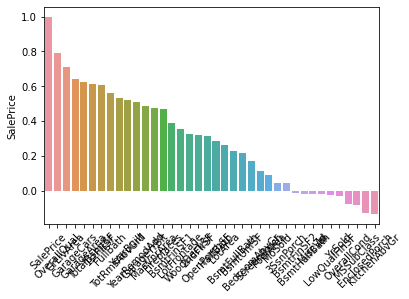

In [22]:
y = corr_train.SalePrice.sort_values(ascending = False)
x = y.index
sb.barplot(x,y)
plt.xticks(rotation = 45)
rcParams['figure.figsize'] = 20,5;

In [23]:
corr_train_index = set(corr_train[(corr_train.SalePrice>0.2) | (corr_train.SalePrice<-0.2)]['SalePrice'].sort_values(ascending = False).index)
train_na_index = set(df_train_na[df_train_na != 0].index)
np.intersect1d(corr_train_index, train_na_index)

array([], dtype=object)

>After the comparison of the two sets where we have stored the parameters which have the highest (<-0.2 & >0.2) correlation coefficient and the parameters with NaN values, we can come to the conclusion that it is not necessary to clean the 81 parameters with a high amount of NaN values

- **LotFrontage**: Linear feet of street connected to property

In [24]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [25]:
print('There are {}% of missing values.'.format((df_train_na['LotFrontage']/df_train.shape[0])*100))

There are 17.73972602739726% of missing values.


In [26]:
print('The correlation coefficient before filling the missing values is {}.'.format(corr_train.SalePrice.LotFrontage))

The correlation coefficient before filling the missing values is 0.35179909657067737.


In [27]:
df_train_clean['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace = True)

In [28]:
df_train_clean['LotFrontage'].isna().sum()

0

In [29]:
print('The correlation coefficient before filling the missing values is {}.'.format(df_train_clean.corr()['SalePrice']['LotFrontage']))

The correlation coefficient before filling the missing values is 0.3349008515405512.


> The NaN values has been filled with the mean without a relevant impact on the correlation coefficient on the SalePrice.

---

- **Alley**: Type of alley access

**Grvl**: Gravel
**Pave**: Paved
**NA**: No alley access

In [30]:
fill_NA(df_train, 'Alley', 'train')

The number of missing values of Alley is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, is much more clear that the NaN values has to be filled with a string which describes that there is no access to the alley.

---

- **MasVnrType**: Masonry veneer type

     **BrkCmn**: Brick Common
     **BrkFace**: Brick Face
     **CBlock**: Cinder Block
     **None**: None
     **Stone**: Stone

In [31]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [32]:
df_train_clean['MasVnrType'].fillna('None', inplace = True)

In [33]:
df_train[df_train_clean['MasVnrType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


> In the case of this variable, since there are only 8 missing values, I am going to consider the premise of that the missing values are "None".

---

- **MasVnrArea**: Masonry veneer area in square feet

So we can be consequent with the criteria used in the prior variable, let's check if the NaN values of the values of MasVnrType and MasVnrArea are in the same lines:

In [34]:
df_train[(df_train['MasVnrType'].isna()) | (df_train['MasVnrArea'].isna())][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


> Considering the results, it makes sense to fill the NaN values with "0", since the NaN values in the variable MasVnrType has been filled with "None".

In [35]:
df_train_clean['MasVnrArea'].fillna(0, inplace = True)

In [36]:
df_train[df_train_clean['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


---

- **BsmtQual**: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [37]:
df_train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [38]:
df_train_clean['BsmtQual'].fillna('TA', inplace = True)

> In this case, considering the low amount of NaN values and that "TA" is the one that appeared with highest frequency, the NaN values are filled with "TA".

---

- **BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [39]:
fill_NA(df_train, 'BsmtCond', 'train')

The number of missing values of BsmtCond is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtExposure**: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement


In [40]:
fill_NA(df_train, 'BsmtExposure', 'train')

The number of missing values of BsmtExposure is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtFinType1**: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [41]:
fill_NA(df_train, 'BsmtFinType1', 'train')

The number of missing values of BsmtFinType1 is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtFinType2**: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [42]:
fill_NA(df_train, 'BsmtFinType2', 'train')

The number of missing values of BsmtFinType2 is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **Electrical**: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed


In [43]:
df_train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
df_train_clean['Electrical'].fillna('SBrkr', inplace = True)

In [45]:
df_train_clean[df_train_clean['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


---

- **FireplaceQu**: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


In [46]:
fill_NA(df_train, 'FireplaceQu', 'train')

The number of missing values of FireplaceQu is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageType**: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [47]:
fill_NA(df_train, 'GarageType', 'train')

The number of missing values of GarageType is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageYrBlt**: Year garage was built

In [48]:
fill_NA(df_train, 'GarageYrBlt', 'train')

The number of missing values of GarageYrBlt is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageFinish**: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [49]:
fill_NA(df_train, 'GarageFinish', 'train')

The number of missing values of GarageFinish is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageQual**: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [50]:
fill_NA(df_train, 'GarageQual', 'train')

The number of missing values of GarageQual is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageCond**: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [51]:
fill_NA(df_train, 'GarageCond', 'train')

The number of missing values of GarageCond is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **PoolQC**: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [52]:
fill_NA(df_train, 'PoolQC', 'train')

The number of missing values of PoolQC is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **Fence**: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [53]:
fill_NA(df_train, 'Fence', 'train')

The number of missing values of Fence is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **MiscFeature**: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [54]:
fill_NA(df_train, 'MiscFeature', 'train')

The number of missing values of MiscFeature is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---
---

### TRAIN SET

- [x] MSZoning         
- [x] LotFrontage      
- [x] Alley           
- [x] Utilities          
- [x] Exterior1st        
- [x] Exterior2nd        
- [x] MasVnrType        
- [x] MasVnrArea        
- [x] BsmtQual          
- [x] BsmtCond          
- [x] BsmtExposure      
- [x] BsmtFinType1      
- [x] BsmtFinSF1         
- [x] BsmtFinType2      
- [x] BsmtFinSF2         
- [x] BsmtUnfSF          
- [x] TotalBsmtSF        
- [x] BsmtFullBath       
- [x] BsmtHalfBath       
- [x] KitchenQual        
- [x] Functional         
- [x] FireplaceQu      
- [x] GarageType        
- [x] GarageYrBlt       
- [x] GarageFinish      
- [x] GarageCars         
- [x] GarageArea         
- [x] GarageQual        
- [x] GarageCond        
- [x] PoolQC          
- [x] Fence           
- [x] MiscFeature     
- [x] SaleType   

The same criteria used for the train set will be followed to fill in the NaN values.

In [55]:
df_test_clean = df_test.copy()

- **MSZoning**: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density


In [56]:
df_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [57]:
df_test[df_test['MSZoning'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [58]:
df_test_clean['MSZoning'].fillna('RL',inplace = True)

In [59]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('MSZoning',df_train_clean['MSZoning'].isna().sum()))

The number of missing values of MSZoning is 0 after the cleaning operation.


> In this case, as there are few NaN values, it is decided to fill them with the most common value, "RL".

---

- **LotFrontage**: Linear feet of street connected to property

In [60]:
df_test['LotFrontage'].describe()

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [61]:
df_test_clean['LotFrontage'].fillna(df_test['LotFrontage'].mean(), inplace = True)

In [62]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('LotFrontage',df_train_clean['LotFrontage'].isna().sum()))

The number of missing values of LotFrontage is 0 after the cleaning operation.


---

- **Alley**: Type of alley access

**Grvl**: Gravel
**Pave**: Paved
**NA**: No alley access

In [63]:
fill_NA(df_test, 'Alley', 'test')

The number of missing values of Alley is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, is much more clear that the NaN values has to be filled with a string which describes that there is no access to the alley.

---

- **Utilities**: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

In [64]:
df_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [65]:
df_test_clean['Utilities'].fillna('AllPub', inplace = True)

In [66]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('Utilities',df_test_clean['Utilities'].isna().sum()))

The number of missing values of Utilities is 0 after the cleaning operation.


> In this case, since all values are "AllPub", the only two NaN values are filled accordingly.

---

- **Exterior1st**: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [67]:
df_test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [68]:
df_test_clean['Exterior1st'].fillna('VinylSd', inplace = True)

In [69]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('Exterior1st',df_test_clean['Exterior1st'].isna().sum()))

The number of missing values of Exterior1st is 0 after the cleaning operation.


> Since there is only one NaN value, it is filled with the most recurring value, 'VinylSd'.

---

- **Exterior1st**: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [70]:
df_test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [71]:
df_test_clean['Exterior1st'].fillna('VinylSd', inplace = True)

In [72]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('Exterior1st',df_test_clean['Exterior1st'].isna().sum()))

The number of missing values of Exterior1st is 0 after the cleaning operation.


> Since there is only one NaN value, it is filled with the most recurring value, 'VinylSd'.

---

- **Exterior2nd**: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [73]:
df_test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [74]:
df_test_clean['Exterior2nd'].fillna('VinylSd', inplace = True)

In [75]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('Exterior2nd',df_test_clean['Exterior2nd'].isna().sum()))

The number of missing values of Exterior2nd is 0 after the cleaning operation.


> Since there is only one NaN value, it is filled with the most recurring value, 'VinylSd'.

---

- **MasVnrType**: Masonry veneer type

     **BrkCmn**: Brick Common
     **BrkFace**: Brick Face
     **CBlock**: Cinder Block
     **None**: None
     **Stone**: Stone

In [76]:
df_test['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [77]:
df_test_clean['MasVnrType'].fillna('None', inplace = True)

In [78]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('MasVnrType',df_test_clean['MasVnrType'].isna().sum()))

The number of missing values of MasVnrType is 0 after the cleaning operation.


> In the case of this variable, since there are only 8 missing values, I am going to consider the premise of that the missing values are "None".

---

- **MasVnrArea**: Masonry veneer area in square feet

So we can be consequent with the criteria used in the prior variable, let's check if the NaN values of the values of MasVnrType and MasVnrArea are in the same lines:

In [79]:
df_test_clean['MasVnrArea'].fillna(0, inplace = True)

In [80]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('MasVnrArea',df_test_clean['MasVnrArea'].isna().sum()))

The number of missing values of MasVnrArea is 0 after the cleaning operation.


---

- **BsmtQual**: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [81]:
df_test['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [82]:
df_test_clean['BsmtQual'].fillna('TA', inplace = True)

> In this case, considering the low amount of NaN values and that "TA" is the one that appeared with highest frequency, the NaN values are filled with "TA".

---

- **BsmtCond**: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [83]:
fill_NA(df_test, 'BsmtCond', 'test')

The number of missing values of BsmtCond is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtExposure**: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement


In [84]:
fill_NA(df_test, 'BsmtExposure', 'test')

The number of missing values of BsmtExposure is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtFinType1**: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [85]:
fill_NA(df_test, 'BsmtFinType1', 'test')

The number of missing values of BsmtFinType1 is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtFinSF1**: Type 1 finished square feet

In [86]:
df_test[df_test['BsmtFinSF1'].isna()]['BsmtFinType1']

660    NaN
Name: BsmtFinType1, dtype: object

In [87]:
df_test_clean['BsmtFinSF1'].fillna(0, inplace = True)

In [88]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('BsmtFinSF1',df_test_clean['BsmtFinSF1'].isna().sum()))

The number of missing values of BsmtFinSF1 is 0 after the cleaning operation.


---

- **BsmtFinType2**: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [89]:
fill_NA(df_test, 'BsmtFinType2', 'test')

The number of missing values of BsmtFinType2 is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


> In this case, it was only necessary to replace the NaN values by "NA", so they are not missing values anymore and can be considered for the analysis.

---

- **BsmtFinSF2**: Type 2 finished square feet

In [90]:
df_test[df_test['BsmtFinSF2'].isna()]['BsmtFinType2']

660    NaN
Name: BsmtFinType2, dtype: object

In [91]:
df_test_clean['BsmtFinSF2'].fillna(0, inplace = True)

In [92]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('BsmtFinSF2',df_test_clean['BsmtFinSF2'].isna().sum()))

The number of missing values of BsmtFinSF2 is 0 after the cleaning operation.


---

- **BsmtUnfSF**: Unfinished square feet of basement area

In [93]:
df_test[df_test['BsmtUnfSF'].isna()]['BsmtUnfSF']

660   NaN
Name: BsmtUnfSF, dtype: float64

In [94]:
df_test_clean['BsmtUnfSF'].fillna(0, inplace = True)

In [95]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('BsmtUnfSF',df_test_clean['BsmtUnfSF'].isna().sum()))

The number of missing values of BsmtUnfSF is 0 after the cleaning operation.


---

- **TotalBsmtSF**: Total square feet of basement area

In [96]:
df_test[df_test['TotalBsmtSF'].isna()]['TotalBsmtSF']

660   NaN
Name: TotalBsmtSF, dtype: float64

In [97]:
df_test_clean['TotalBsmtSF'].fillna(0, inplace = True)

In [98]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('TotalBsmtSF',df_test_clean['TotalBsmtSF'].isna().sum()))

The number of missing values of TotalBsmtSF is 0 after the cleaning operation.


- **BsmtFullBath**: Basement full bathrooms

In [99]:
df_test[df_test['BsmtFullBath'].isna()]['BsmtFullBath']

660   NaN
728   NaN
Name: BsmtFullBath, dtype: float64

In [100]:
df_test_clean['BsmtFullBath'].fillna(0, inplace = True)

In [101]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('BsmtFullBath',df_test_clean['BsmtFullBath'].isna().sum()))

The number of missing values of BsmtFullBath is 0 after the cleaning operation.


- **BsmtHalfBath**: Basement half bathrooms

In [102]:
df_test[df_test['BsmtHalfBath'].isna()]['BsmtHalfBath']

660   NaN
728   NaN
Name: BsmtHalfBath, dtype: float64

In [103]:
df_test['BsmtHalfBath'].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [104]:
df_test_clean['BsmtHalfBath'].fillna(0, inplace = True)

In [105]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('BsmtHalfBath',df_test_clean['BsmtHalfBath'].isna().sum()))

The number of missing values of BsmtHalfBath is 0 after the cleaning operation.


- **KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [106]:
df_test['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [107]:
df_test_clean['KitchenQual'].fillna('TA', inplace = True)

In [108]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('KitchenQual',df_test_clean['KitchenQual'].isna().sum()))

The number of missing values of KitchenQual is 0 after the cleaning operation.


- **Functional**: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [109]:
df_test['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [110]:
df_test_clean['Functional'].fillna('Typ', inplace = True)

In [111]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('Functional',df_test_clean['Functional'].isna().sum()))

The number of missing values of Functional is 0 after the cleaning operation.


- **FireplaceQu**: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


In [112]:
fill_NA(df_test, 'FireplaceQu', 'test')

The number of missing values of FireplaceQu is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageType**: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [113]:
fill_NA(df_test, 'GarageType', 'test')

The number of missing values of GarageType is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageYrBlt**: Year garage was built

In [114]:
fill_NA(df_test, 'GarageYrBlt', 'test')

The number of missing values of GarageYrBlt is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageFinish**: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [115]:
fill_NA(df_test, 'GarageFinish', 'test')

The number of missing values of GarageFinish is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageCars**: Size of garage in car capacity


In [116]:
df_test['GarageCars'].median()

2.0

In [117]:
df_test_clean['GarageCars'].fillna(df_test['GarageCars'].median(), inplace = True)

In [118]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('GarageCars',df_test_clean['GarageCars'].isna().sum()))

The number of missing values of GarageCars is 0 after the cleaning operation.


---

- **GarageArea** : Size of garage in square feet

In [119]:
df_test[df_test['GarageArea'].isna()]['GarageType']

1116    Detchd
Name: GarageType, dtype: object

In [120]:
df_test_clean['GarageArea'].fillna(df_test['GarageArea'].mean(), inplace = True)

In [121]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('GarageArea',df_test_clean['GarageArea'].isna().sum()))

The number of missing values of GarageArea is 0 after the cleaning operation.


---

- **GarageQual**: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [122]:
fill_NA(df_test, 'GarageQual', 'test')

The number of missing values of GarageQual is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **GarageCond**: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [123]:
fill_NA(df_test, 'GarageCond', 'test')

The number of missing values of GarageCond is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **PoolQC**: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [124]:
fill_NA(df_test, 'PoolQC', 'test')

The number of missing values of PoolQC is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **Fence**: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [125]:
fill_NA(df_test, 'Fence', 'test')

The number of missing values of Fence is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **MiscFeature**: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [126]:
fill_NA(df_test, 'MiscFeature', 'test')

The number of missing values of MiscFeature is 0 after the cleaning operation.
In this case, the NaN values have been replaced by the string "NA", as shown in the variable description.


---

- **SaleType**: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [127]:
df_test[df_test['SaleType'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal


In [128]:
df_test['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [129]:
df_test_clean['SaleType'].fillna('WD', inplace = True)

In [130]:
print('The number of missing values of {} is {} after the cleaning operation.'.format('SaleType',df_test_clean['SaleType'].isna().sum()))

The number of missing values of SaleType is 0 after the cleaning operation.


CHECKING THAT THERE IS NO MISSING VALUES IN THE TEST DATA SET ANYMORE:

In [131]:
df_test_clean_na = df_test_clean.isna().sum()
df_test_clean_na = df_test_clean_na[df_test_clean_na != 0]
df_test_clean_na

Series([], dtype: int64)

---
---

<div class="alert alert-block alert-info">
<b>DATA TYPES MODIFICATION</b> </div>

### TRAIN SET

- **Object to categorical data**
Since all the columns with object data (and even one with integer data) classifies the data in categories, the object data should be turn into categorical data to facilitate the subsequent analysis.

In [132]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [133]:
category = df_train_clean.select_dtypes(object).columns

In [134]:
# category = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
#             'Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#             'ExterQual','ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
#             'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
#             'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [135]:
df_train_clean.select_dtypes(object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,1999.0,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1456,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1978.0,Unf,TA,TA,Y,NA,MnPrv,NA,WD,Normal
1457,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,1941.0,RFn,TA,TA,Y,NA,GdPrv,Shed,WD,Normal
1458,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1950.0,Unf,TA,TA,Y,NA,NA,NA,WD,Normal


In [136]:
df_train_clean[category] = df_train_clean[category].apply(lambda x: x.astype('category'))

In [137]:
df_train_clean[['MSSubClass', 'OverallQual', 'OverallCond']] = df_train_clean[['MSSubClass', 'OverallQual', 'OverallCond']].astype('category')

### TEST SET

In [138]:
df_test_clean[category] = df_test_clean[category].apply(lambda x: x.astype('category'))

In [139]:
df_test_clean[['MSSubClass', 'OverallQual', 'OverallCond']] = df_test_clean[['MSSubClass', 'OverallQual', 'OverallCond']].astype('category')

---
---

<div class="alert alert-block alert-info">
<b>DUMMY VARIABLES</b> </div>

### TRAIN SET

In [140]:
cat = df_train_clean.select_dtypes('category').columns

In [141]:
df_train_dummies = pd.get_dummies(df_test_clean[cat])
df_train_dummies

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1456,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [142]:
df_train_clean = pd.concat([df_train_clean, df_train_dummies],axis = 1)
df_train_clean.drop(cat, axis = 1, inplace = True)

In [143]:
df_train_clean.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [144]:
df_train_clean.corr()['SalePrice'].sort_values(ascending = False)

SalePrice            1.000000
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
TotalBsmtSF          0.613581
                       ...   
MSZoning_RM         -0.058150
Foundation_BrkTil   -0.058444
EnclosedPorch       -0.128578
KitchenAbvGr        -0.135907
Utilities_AllPub          NaN
Name: SalePrice, Length: 414, dtype: float64

---
---

<div class="alert alert-block alert-info">
<b>ENCODING</b> </div>

Now it is time to find the best possible model and to train it to get the best possible solution:

In [145]:
df_train_clean.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [146]:
df_train_clean.dropna(inplace = True)
X = df_train_clean.drop('SalePrice', axis = 1)
y = df_train_clean.SalePrice

In [147]:
df_train_clean

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,62.0,7500,2004,2005,0.0,410,0,811,1221,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,1456,62.0,7917,1999,2000,0.0,0,0,953,953,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,1457,85.0,13175,1978,1988,119.0,790,163,589,1542,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,1458,66.0,9042,1941,2006,0.0,275,0,877,1152,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
standsc = StandardScaler()
y_train = np.asarray(y_train).reshape(-1,1)
X_train = standsc.fit_transform(X_train)
y_train = standsc.fit_transform(y_train)

In [149]:
df_train_clean[df_train_clean['BsmtFinSF1'].isna()]

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


Now we are going to train different models, so we can compare between them which is the one with the best performance:

In [150]:
models = {
    'ridge' : Ridge(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4),
    }

In [151]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

ridge trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


gradient boosting trained
lasso trained


C:\Users\gonza\AppData\Local\Temp/ipykernel_22560/2815109636.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


random forest trained
bayesian ridge trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


support vector trained
knn trained


In [152]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

After having trained the different models, now it is time to see the results of the negative mean square error:

In [153]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

ridge : 0.68
gradient boosting : 0.398
lasso : 0.989
random forest : 0.422
bayesian ridge : 0.569
support vector : 0.595
knn : 0.935


> We can observed that the model with the better performance is RandomForestRegressor, although the result is not specially accurate according to the cross validation. 

In [154]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [155]:
random_forest = RandomForestRegressor()

In [156]:
random_forest.fit(X_train, y_train)

C:\Users\gonza\AppData\Local\Temp/ipykernel_22560/2566748861.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestRegressor()

In [157]:
y_pred = random_forest.predict(X_test)

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Let's try to improve the performance of the model based by eliminating the factors with lower correlation rate.

In [158]:
df_train_clean.corr()['SalePrice'].sort_values(ascending = False)

SalePrice            1.000000
GrLivArea            0.708584
GarageCars           0.640383
GarageArea           0.623385
TotalBsmtSF          0.613792
                       ...   
MSZoning_RM         -0.058150
Foundation_BrkTil   -0.058444
EnclosedPorch       -0.128695
KitchenAbvGr        -0.135979
Utilities_AllPub          NaN
Name: SalePrice, Length: 414, dtype: float64

In [159]:
high_corr = pd.DataFrame(df_train_clean.corr()['SalePrice'].sort_values(ascending = False)).rename(columns= {'SalePrice' : 'Correlation'})

In [160]:
ind = high_corr[high_corr['Correlation'] > 0.5].index.to_list()

In [161]:
X_2 = df_train_clean[ind].drop('SalePrice', axis = 1)
y_2 = df_train_clean[ind].SalePrice

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 42)
standsc = StandardScaler()
y_train = np.asarray(y_train).reshape(-1,1)
X_train = standsc.fit_transform(X_train)
y_train = standsc.fit_transform(y_train)

By implementing the same steps as before: 

In [163]:
models = {
    'ridge' : Ridge(),
    'gradient boosting' : GradientBoostingRegressor(),
    'lasso' : Lasso(),
    'random forest' : RandomForestRegressor(),
    'bayesian ridge' : BayesianRidge(),
    'support vector': SVR(),
    'knn' : KNeighborsRegressor(n_neighbors = 4),
    }

In [164]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

ridge trained
gradient boosting trained
lasso trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\AppData\Local\Temp/ipykernel_22560/2815109636.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


random forest trained
bayesian ridge trained
support vector trained
knn trained


C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
results_2 = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results_2[name] = result

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gonza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

The results of this new scenario are:

In [166]:
for name, result in results_2.items():
    print(f"{name} : {round(result, 3)}")

ridge : 0.532
gradient boosting : 0.45
lasso : 0.989
random forest : 0.437
bayesian ridge : 0.532
support vector : 0.444
knn : 0.484


And comparing them with the values achieved earlier...

In [167]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

ridge : 0.68
gradient boosting : 0.398
lasso : 0.989
random forest : 0.422
bayesian ridge : 0.569
support vector : 0.595
knn : 0.935


> ANALIZAR LOS RESULTADOS